In [15]:
import numpy as np # data analysis
import pandas as pd # mathematical functions,vectors
import seaborn as sns # visualization
import matplotlib.pyplot as plt # visualization
from matplotlib.colors import ListedColormap
import dash
from dash import dcc, html
import plotly.express as px

from sklearn.preprocessing import StandardScaler # to standardization
from sklearn.model_selection import train_test_split, GridSearchCV # to select best KNN parameters
from sklearn.metrics import accuracy_score, confusion_matrix # to learn where did we wrong
#from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")
    

In [32]:
data = pd.read_csv("data.csv")

In [3]:
data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [4]:
data.columns


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [33]:
data.drop(["id","Unnamed: 32"], inplace = True, axis = 1) # inplace: save after drop, axis = 1: drop as column

data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [34]:
data = data.rename(columns = {"diagnosis":"target"})

In [35]:
data.target = [1 if each.strip() == "M" else 0 for each in data.target] 

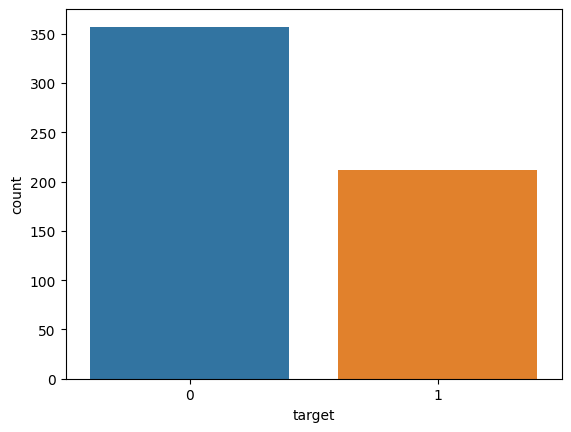

In [8]:
sns.countplot(x = data.target)
plt.show()

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   target                   569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

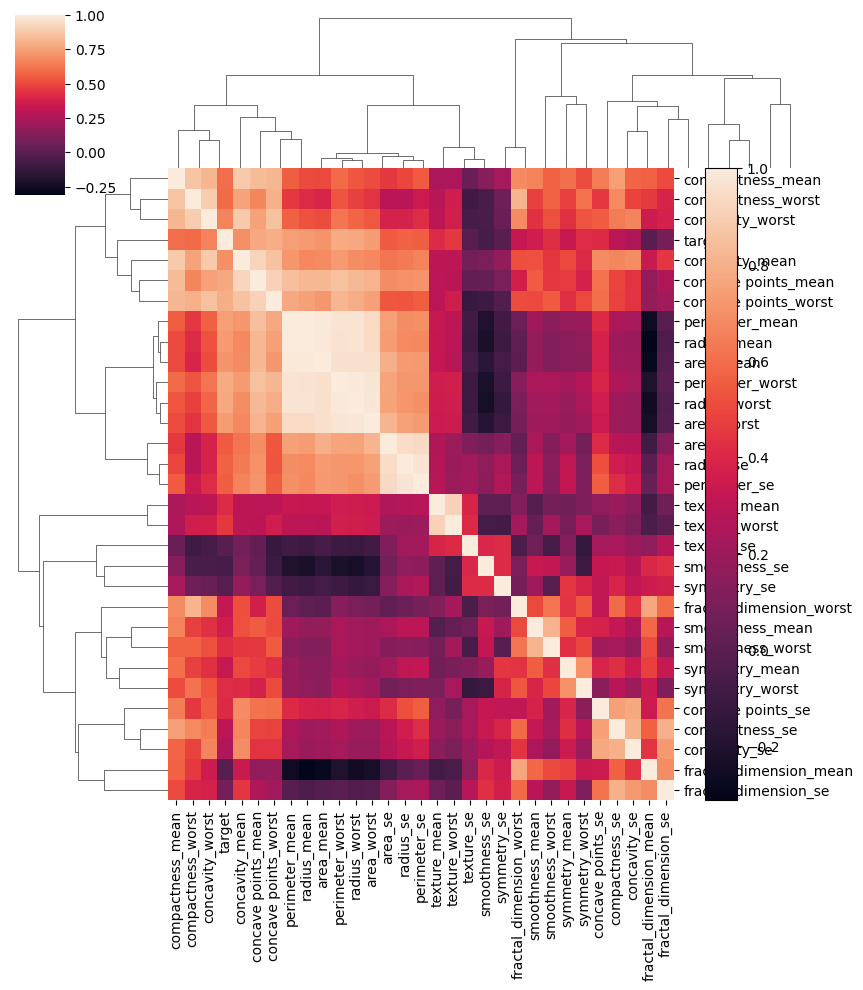

In [10]:
corr_matrix = data.corr()

# Create the cluster map for the full correlation matrix
cluster_map = sns.clustermap(corr_matrix, annot=False, fmt=".2f", figsize=(10, 10))

# Get the mappable object from the cluster map
mappable = cluster_map.ax_heatmap.collections[0]

# Show the colorbar using the mappable object
plt.colorbar(mappable)

# Display the cluster map
plt.show()

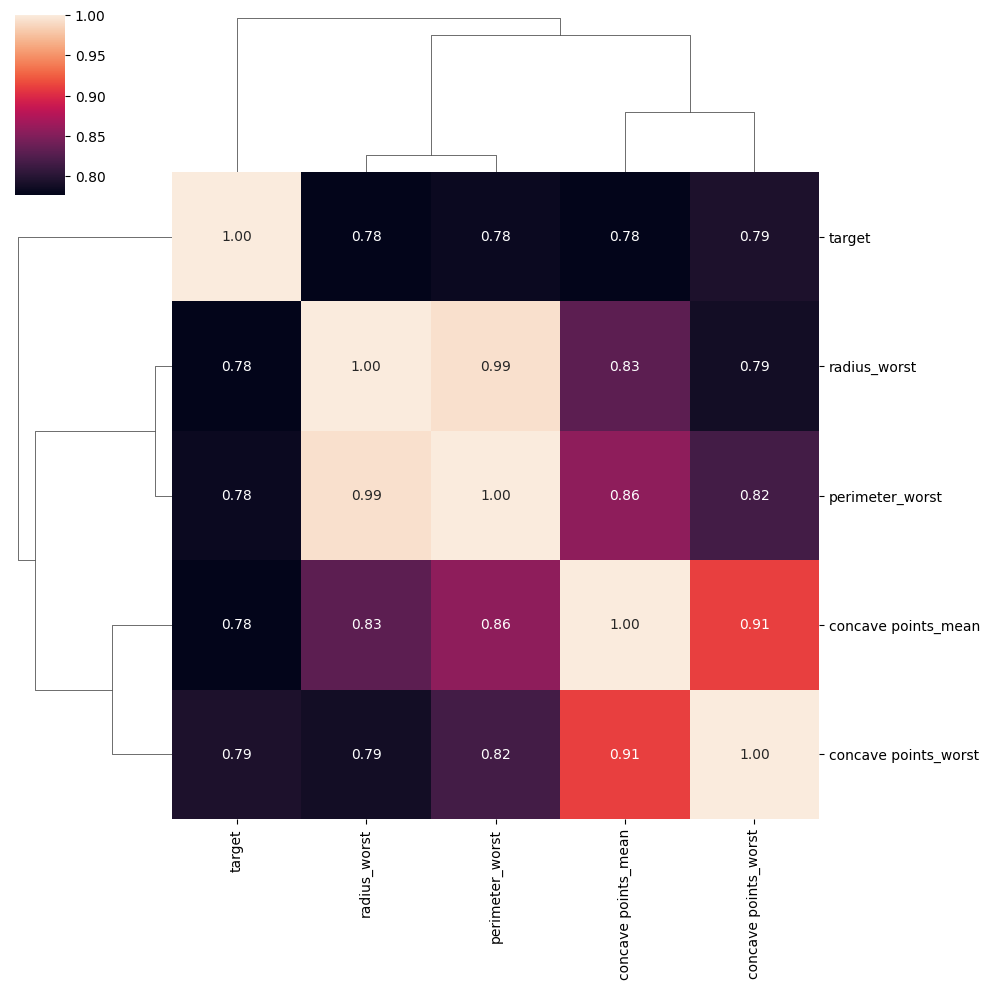

In [11]:
corr_matrix = data.corr()
threshold = 0.75
filtre = np.abs(corr_matrix["target"]) > threshold
corr_features = corr_matrix.columns[filtre].tolist()

# Check if all the column names in corr_features actually exist in the data DataFrame
corr_features = [feat for feat in corr_features if feat in data.columns]

if corr_features:
    # Create a subset of the DataFrame with the selected correlated features
    subset_data = data[corr_features]

    # Check if the subset_data DataFrame has enough observations to create the cluster map
    if len(subset_data) > 1:
        sns.clustermap(subset_data.corr(), annot=True, fmt=".2f", figsize=(10, 10))
        plt.show()
    else:
        print("Not enough observations to create the cluster map.")
else:
    print("No correlated features found based on the specified threshold.")

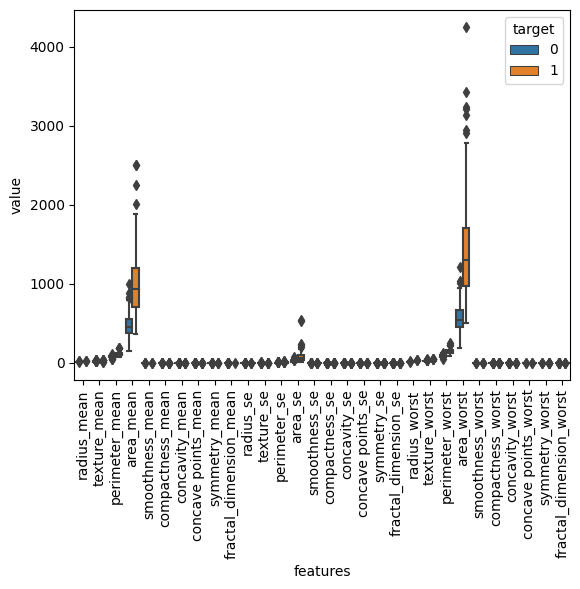

In [36]:
data_melted = pd.melt(data,id_vars = "target",
                   var_name = "features",
                   value_name = "value")
plt.figure()
sns.boxplot(x = "features", y = "value", hue = "target", data = data_melted)
plt.xticks(rotation = 90)
plt.show()
#the features have different values so we need to normalise them

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

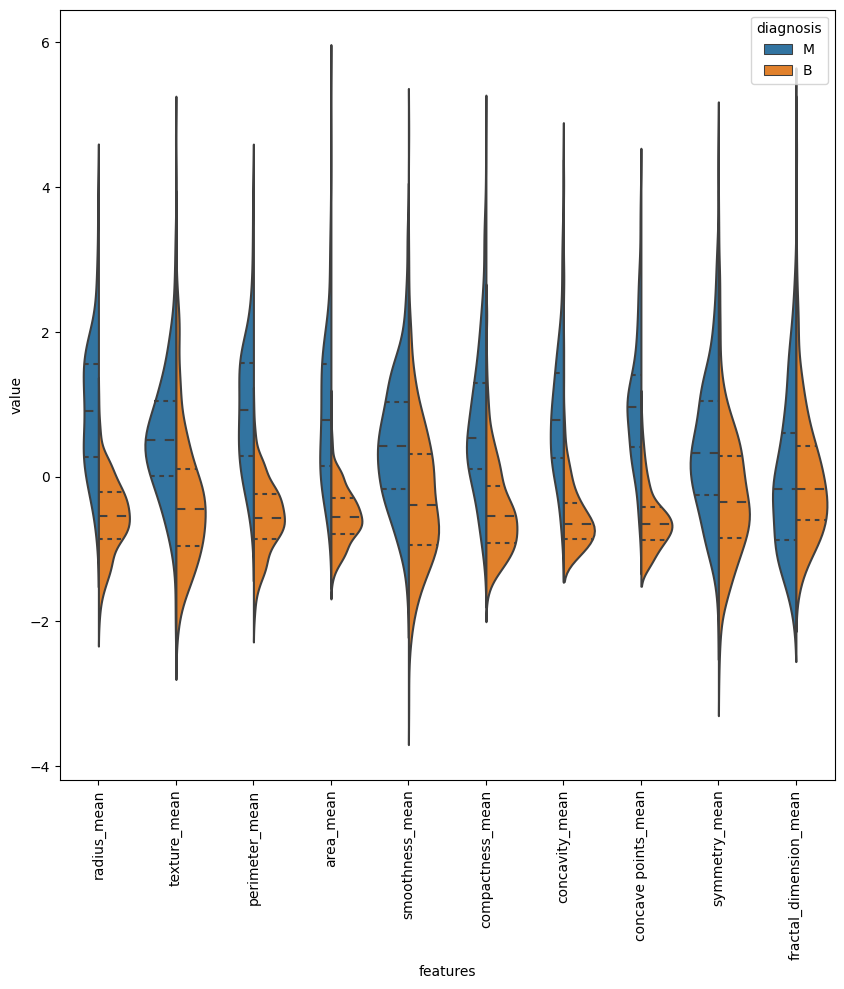

In [37]:
data = pd.read_csv("data.csv")
# y includes our labels and x includes our features
y = data.diagnosis                          # M or B 
list = ['Unnamed: 32','id','diagnosis']
x = data.drop(list,axis = 1 )

data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

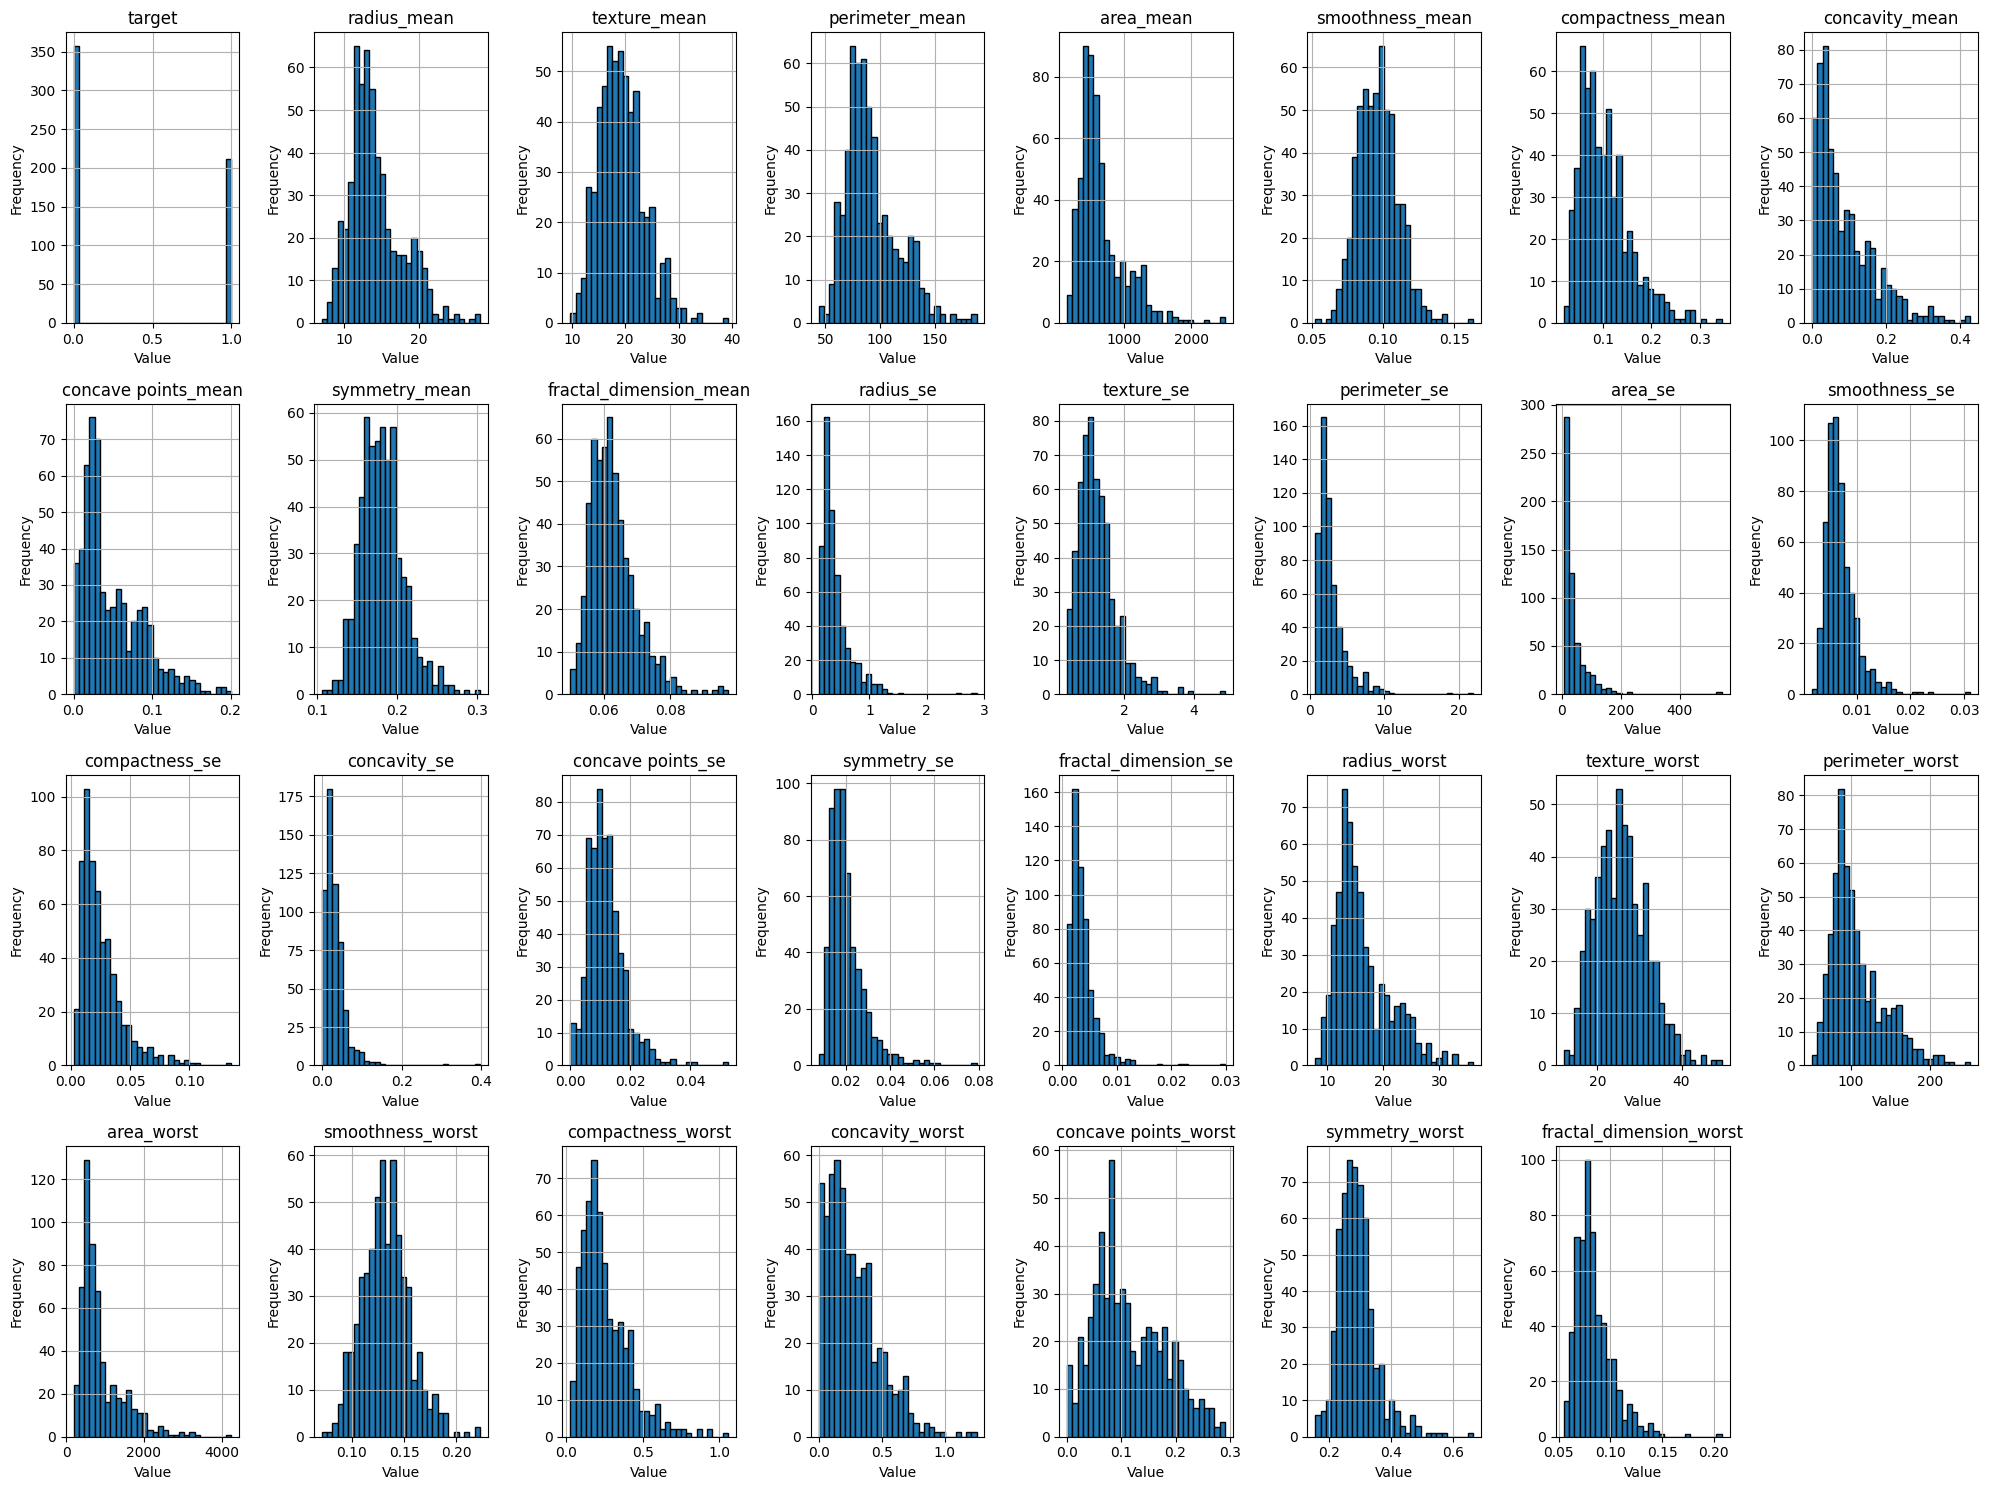

In [13]:
columns = data.columns.tolist()

# Calculate the number of rows and columns for subplots
num_rows = 4
num_cols = 8

# Calculate the total number of subplots
total_subplots = len(columns)

# Create the figure and axes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

# Flatten the axes array to loop through all subplots
axes = axes.flatten()

# Loop through each column and plot its distribution
for i, column in enumerate(columns):
    data[column].hist(bins=30, edgecolor='black', ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Hide any empty subplots
for i in range(total_subplots, num_rows * num_cols):
    axes[i].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

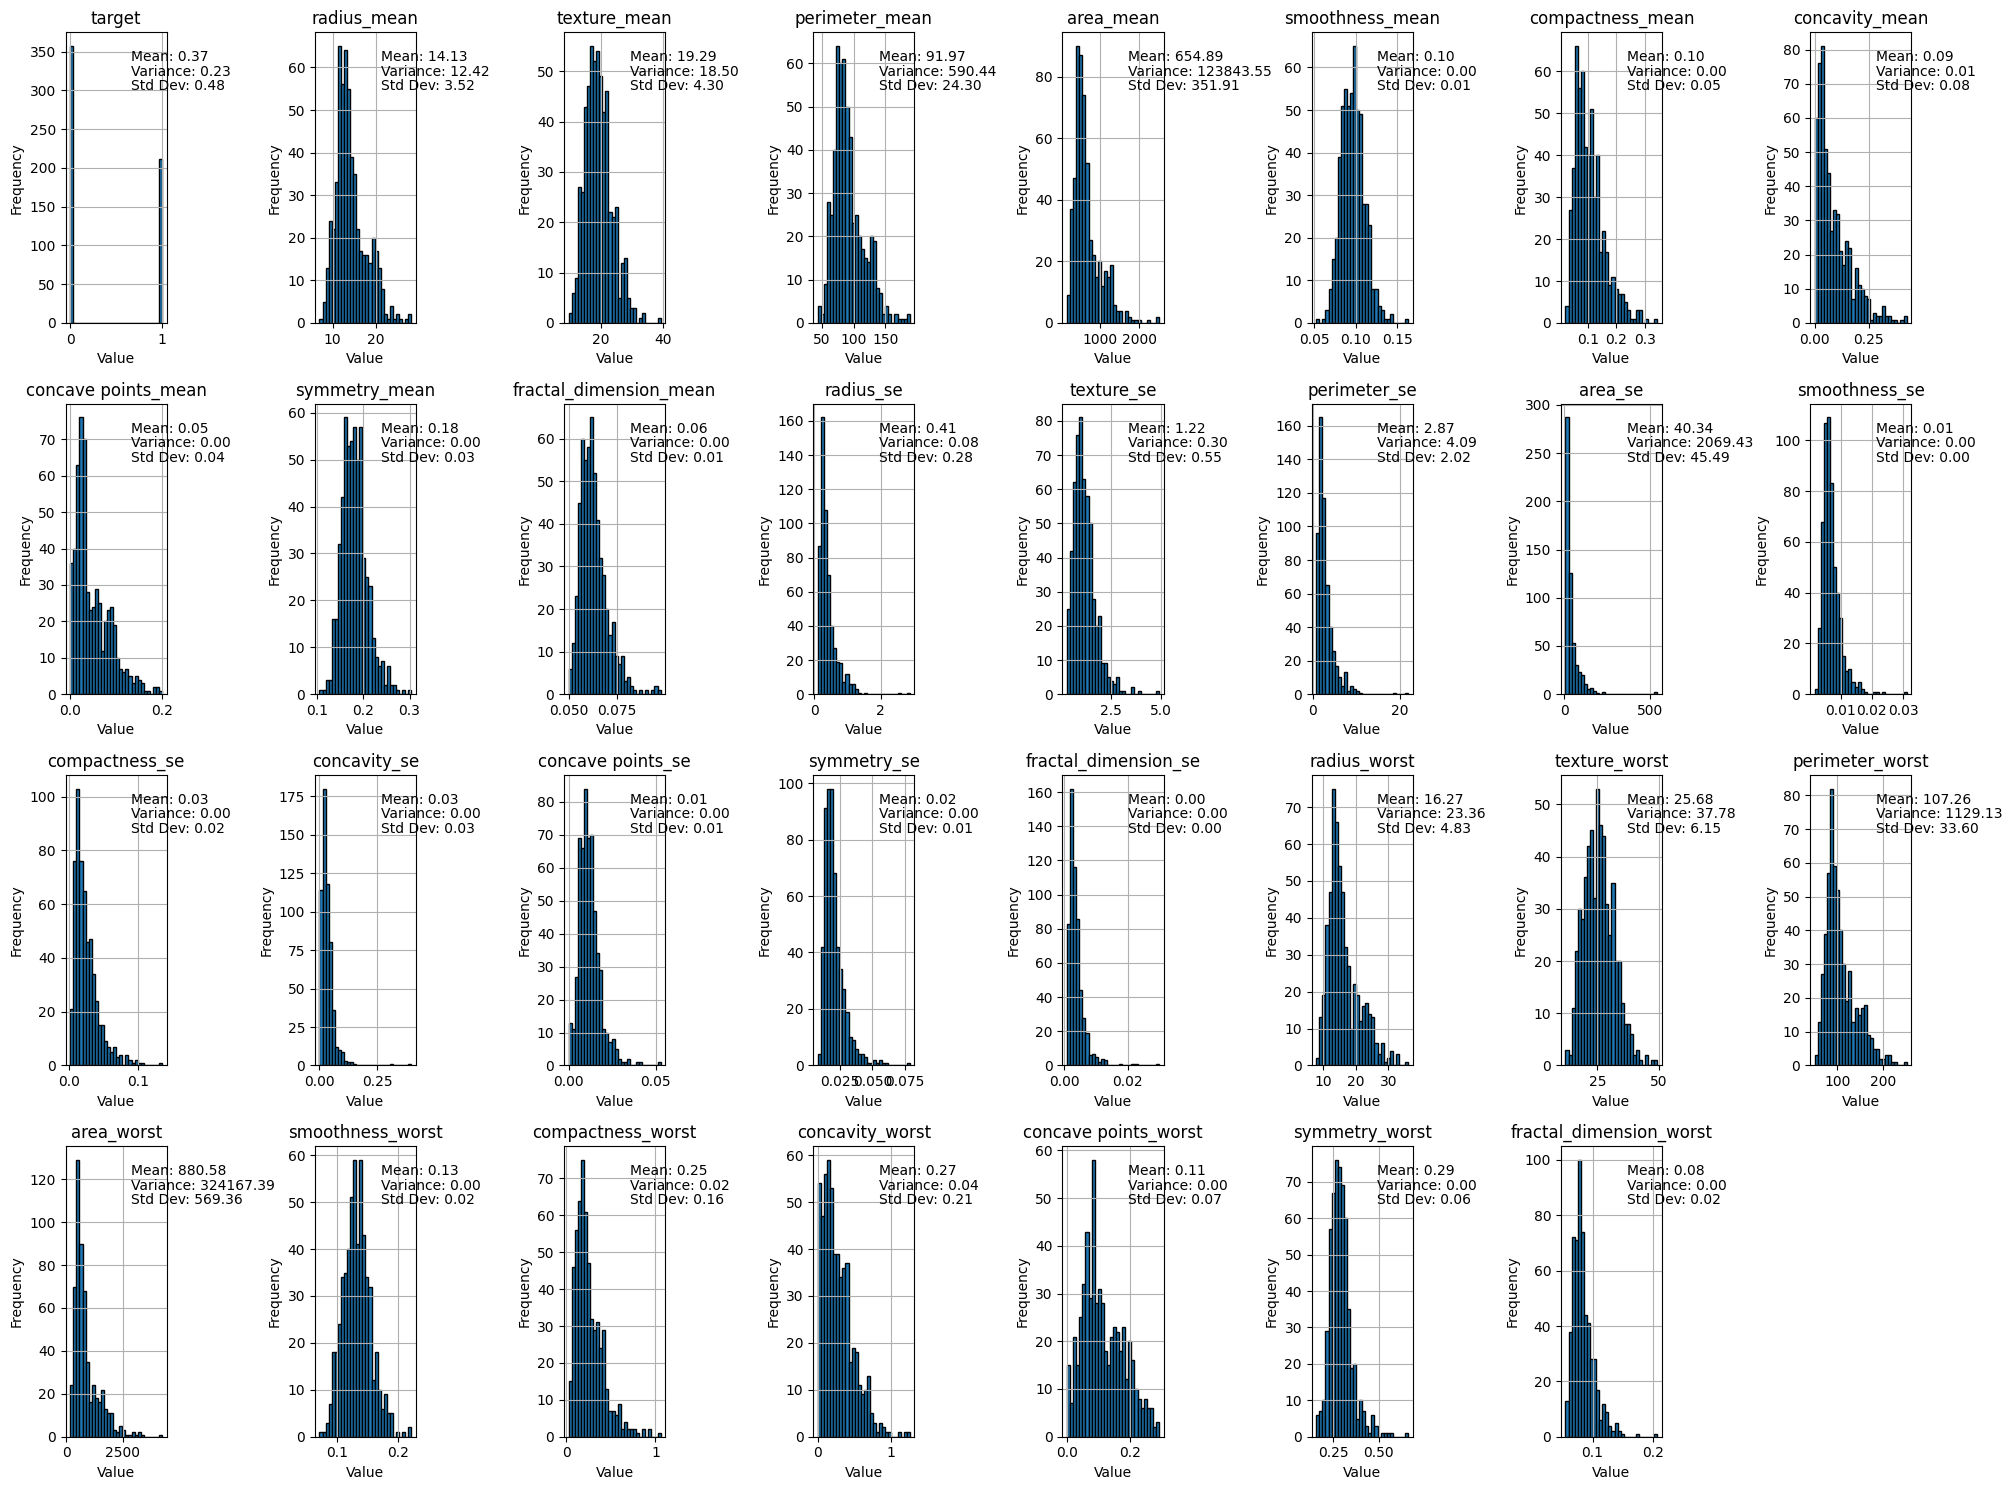

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already defined the DataFrame data.
# If not, you can load your dataset here.

# Get the list of column names
columns = data.columns.tolist()

# Calculate the number of rows and columns for subplots
num_rows = 4
num_cols = 8

# Calculate the total number of subplots
total_subplots = len(columns)

# Create the figure and axes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

# Flatten the axes array to loop through all subplots
axes = axes.flatten()

# Loop through each column and plot its distribution
for i, column in enumerate(columns):
    data[column].hist(bins=30, edgecolor='black', ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    
    # Compute basic properties of each distribution
    mean_val = data[column].mean()
    variance_val = data[column].var()
    std_dev_val = data[column].std()
    
    # Add text to the subplot with the computed properties
    axes[i].text(0.65, 0.9, f"Mean: {mean_val:.2f}", transform=axes[i].transAxes, fontsize=10)
    axes[i].text(0.65, 0.85, f"Variance: {variance_val:.2f}", transform=axes[i].transAxes, fontsize=10)
    axes[i].text(0.65, 0.8, f"Std Dev: {std_dev_val:.2f}", transform=axes[i].transAxes, fontsize=10)

# Hide any empty subplots
for i in range(total_subplots, num_rows * num_cols):
    axes[i].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

# Read the dataset
data = pd.read_csv("data.csv")

# Convert 'diagnosis' column to numeric values (0 for 'B' and 1 for 'M')
data['diagnosis'] = data['diagnosis'].map({'B': 0, 'M': 1})

# Separate features and target variable
X = data.drop(['diagnosis', 'id'], axis=1)  # Drop 'diagnosis' and 'id' columns as features
y = data['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train_imputed, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_imputed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print("Logistic Regression Model Performance:")
print("-------------------------------------")
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report_str)
print("Confusion Matrix:")
print(conf_matrix)



Logistic Regression Model Performance:
-------------------------------------
Accuracy: 0.9707602339181286

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

Confusion Matrix:
[[107   1]
 [  4  59]]


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Read the dataset
data = pd.read_csv("data.csv")

# Convert 'diagnosis' column to numeric values (0 for 'B' and 1 for 'M')
data['diagnosis'] = data['diagnosis'].map({'B': 0, 'M': 1})

# Separate features and target variable
X = data.drop(['diagnosis', 'id'], axis=1)  # Drop 'diagnosis' and 'id' columns as features
y = data['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train_imputed)
X_test_standardized = scaler.transform(X_test_imputed)

# Create and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train_standardized, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_standardized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print("Logistic Regression Model Performance:")
print("-------------------------------------")
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report_str)
print("Confusion Matrix:")
print(conf_matrix)



Logistic Regression Model Performance:
-------------------------------------
Accuracy: 0.9824561403508771

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

Confusion Matrix:
[[106   2]
 [  1  62]]


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Read the dataset
data = pd.read_csv("data.csv")

# Convert 'diagnosis' column to numeric values (0 for 'B' and 1 for 'M')
data['diagnosis'] = data['diagnosis'].map({'B': 0, 'M': 1})

# Separate features and target variable
X = data.drop(['diagnosis', 'id'], axis=1)  # Drop 'diagnosis' and 'id' columns as features
y = data['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train_imputed)
X_test_standardized = scaler.transform(X_test_imputed)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train_standardized, y_train)

# Make predictions on the test set (convert probability to binary)
y_pred_prob = model.predict(X_test_standardized)
y_pred = (y_pred_prob >= 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print("Minimal Regression Model Performance:")
print("-------------------------------------")
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report_str)
print("Confusion Matrix:")
print(conf_matrix)


Minimal Regression Model Performance:
-------------------------------------
Accuracy: 0.9532163742690059

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       108
           1       0.97      0.90      0.93        63

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171

Confusion Matrix:
[[106   2]
 [  6  57]]


In [19]:
def plotCorrelationMatrix(df, graphWidth):
    # Select only numeric columns for correlation calculation
    numeric_df = df.select_dtypes(include=[float, int])

    if numeric_df.shape[1] < 2:
        print("No correlation plots shown: There are not enough numeric features.")
        return

    # Drop columns with NaN values
    numeric_df = numeric_df.dropna(axis='columns')

    # Keep columns where there are more than 1 unique values
    numeric_df = numeric_df[[col for col in numeric_df if numeric_df[col].nunique() > 1]]

    # Calculate the correlation matrix
    corr = numeric_df.corr()

    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum=1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix', fontsize=15)
    plt.show()



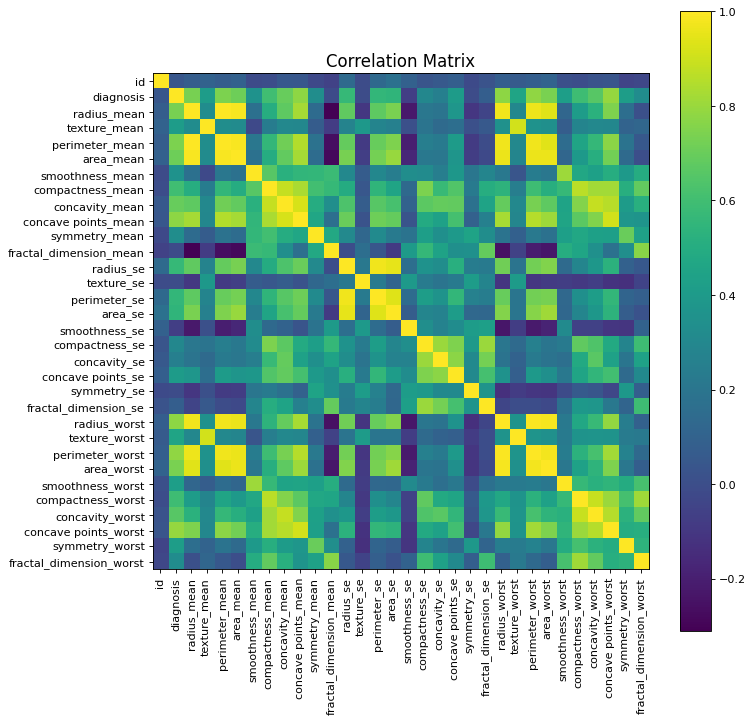

In [20]:
plotCorrelationMatrix(data, 10)

In [21]:
def plotCorrelationMatrix2(df, graphWidth):
    # Select only numeric columns for correlation calculation
    numeric_df = df.select_dtypes(include=[float, int])

    if numeric_df.shape[1] < 2:
        print("No correlation plots shown: There are not enough numeric features.")
        return

    # Drop columns with NaN values
    numeric_df = numeric_df.dropna(axis='columns')

    # Keep columns where there are more than 1 unique values
    numeric_df = numeric_df[[col for col in numeric_df if numeric_df[col].nunique() > 1]]

    # Calculate the correlation matrix
    corr = numeric_df.corr()

    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    sns.heatmap(corr, cmap='RdPu', annot=False, fmt=".2f", linewidths=0.5)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90, fontsize=8)
    plt.yticks(range(len(corr.columns)), corr.columns, fontsize=8)
    plt.title(f'Correlation Matrix', fontsize=15)
    plt.show()


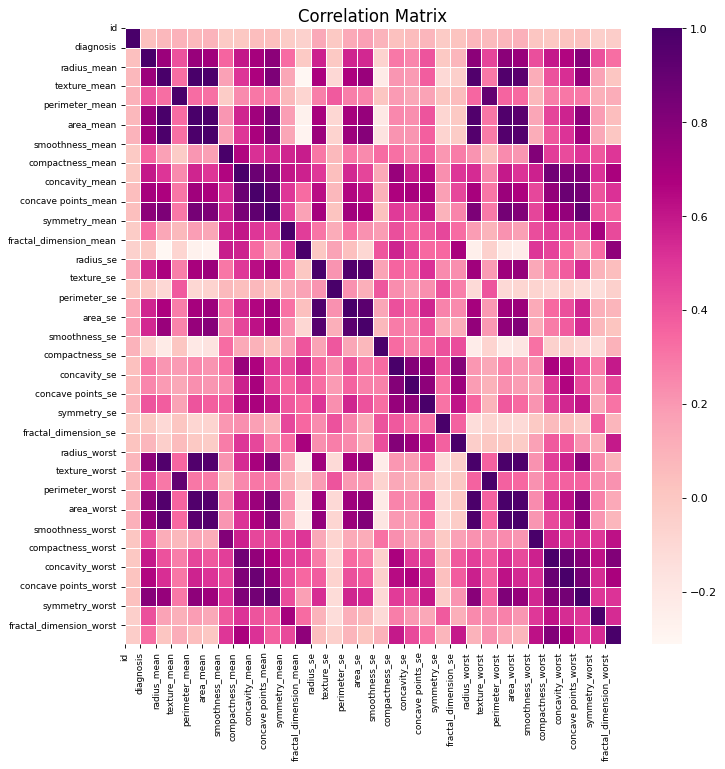

In [22]:
plotCorrelationMatrix2(data, 10)

In [30]:
import pandas as pd
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.graph_objects as go
import plotly.express as px

# Read the dataset
data = pd.read_csv("data.csv")

# Create the Dash app
app = dash.Dash(__name__)

# Dropdown options
feature_options = [{'label': feature, 'value': feature} for feature in data.columns[2:-1]]

# Layout of the app
app.layout = html.Div([
    html.H1("Breast Cancer Data Dashboard"),
    html.P("The goal is to build a model that can predict whether a tumor is malignant - M (cancerous) or benign - B (non-cancerous) based on various features extracted from medical images of the tumor."),

    # Dropdown to select the feature
    dcc.Dropdown(
        id='feature-dropdown',
        options=feature_options,
        value=data.columns[2],  # Default value for the dropdown
        style={'width': '50%'}
    ),

    # Chart to show the distribution and correlation
    dcc.Graph(id='feature-plot'),

    # Correlation matrix plot
    html.H2("Correlation Matrix"),
    dcc.Graph(id='correlation-matrix-plot'),

    # Histogram of 'echo' feature distribution with mean, variance, and standard error
    dcc.Graph(id='echo-histogram'),

    # Box plot of selected feature
    dcc.Graph(id='box-plot'),

    # Violin plot of selected feature with both diagnoses
    dcc.Graph(id='violin-plot'),
])

# Callback to update the chart based on the selected feature
@app.callback(
    [Output('feature-plot', 'figure'),
     Output('echo-histogram', 'figure'),
     Output('box-plot', 'figure'),
     Output('violin-plot', 'figure')],
    [Input('feature-dropdown', 'value')]
)
def update_plots(selected_feature):
    fig1 = px.histogram(data, x=selected_feature, color='diagnosis', barmode='overlay', nbins=100,
                        category_orders={'diagnosis': [0, 1]}, color_discrete_map={0: 'blue', 1: 'red'})
    fig1.update_layout(title=f"Distribution of {selected_feature} and Correlation with Diagnosis",
                       xaxis_title=selected_feature,
                       yaxis_title="Count",
                       showlegend=True)

    # Calculate mean, variance, and standard error of the selected feature
    mean_val = data[selected_feature].mean()
    variance_val = data[selected_feature].var()
    std_err_val = data[selected_feature].sem()

    # Create histogram plot for the selected feature
    fig2 = go.Figure()
    fig2.add_trace(go.Histogram(x=data[selected_feature], nbinsx=50, histnorm='probability', name='Distribution'))
    fig2.add_trace(go.Scatter(x=[mean_val, mean_val], y=[0, 0.15], mode='lines', name='Mean',
                              line=dict(color='red', dash='dash')))
    fig2.add_trace(go.Scatter(x=[mean_val - std_err_val, mean_val + std_err_val], y=[0.05, 0.05], mode='lines',
                              fill='tozeroy', fillcolor='rgba(255, 0, 0, 0.3)', name='Standard Error'))
    fig2.update_layout(title=f"{selected_feature} Distribution with Mean, Variance, and Standard Error",
                       xaxis_title=selected_feature,
                       yaxis_title="Probability",
                       showlegend=True)

    # Create box plot for the selected feature
    fig3 = px.box(data, x='diagnosis', y=selected_feature, color='diagnosis', points='all')
    fig3.update_layout(title=f"Box Plot of {selected_feature} by Diagnosis",
                       xaxis_title='Diagnosis',
                       yaxis_title=selected_feature,
                       showlegend=False)

    # Merge the data for both diagnoses for the violin plot
    violin_data = pd.melt(data, id_vars="diagnosis", value_vars=selected_feature)

    # Create violin plot for the selected feature with both diagnoses
    fig4 = px.violin(violin_data, x='diagnosis', y='value', color='diagnosis', box=True, points="all",
                     hover_data=violin_data.columns, category_orders={'diagnosis': ['M', 'B']},
                     color_discrete_map={'M': 'red', 'B': 'blue'})

    fig4.update_layout(title=f"Violin Plot of {selected_feature} by Diagnosis",
                       xaxis_title='Diagnosis',
                       yaxis_title=selected_feature,
                       showlegend=False)

    # Set stripmode to 'overlay' to show data points for both diagnoses on the violin plot
    fig4.update_traces(marker=dict(size=4, opacity=0.6, line=dict(width=0.5)),
                        selector=dict(mode='markers'),
                        box_visible=True)

    return fig1, fig2, fig3, fig4

# Callback to update the correlation matrix plot
@app.callback(
    Output('correlation-matrix-plot', 'figure'),
    [Input('feature-dropdown', 'value')]
)
def update_correlation_matrix(selected_feature):
    # Select only numeric columns for correlation calculation
    numeric_df = data.select_dtypes(include=[float, int])

    # Drop columns with NaN values
    numeric_df = numeric_df.dropna(axis='columns')

    # Keep columns where there are more than 1 unique values
    numeric_df = numeric_df[[col for col in numeric_df if col != 'id' and numeric_df[col].nunique() > 1]]

    # Calculate the correlation matrix
    corr = numeric_df.corr()

    fig = go.Figure(data=go.Heatmap(z=corr.values,
                                    x=corr.columns,
                                    y=corr.columns,
                                    colorscale='RdPu',
                                    zmin=-1,
                                    zmax=1))
    fig.update_layout(title=f'Correlation Matrix',
                      xaxis_title='Features',
                      yaxis_title='Features',
                      width=800,
                      height=800)
    return fig

if __name__ == '__main__':
    app.run_server(port=8050, debug=True)
